<a href="https://www.kaggle.com/code/vincentmichler/predicting-employee-attrition-ibm-dataset?scriptVersionId=158162041" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


# 💼 Attrition @ IBM || Why employees quit?

Attrition in the workplace, a persistent challenge for many organizations, represents the rate at which employees voluntarily leave a company over a set period. This phenomenon poses significant problems for companies like IBM and others in the tech industry. 
When experienced employees depart, companies face not only the loss of valuable institutional knowledge and skills but also the high costs and resource-intensive process associated with recruiting, hiring, and training new personnel. 

Moreover, a high attrition rate can tarnish a company's reputation as an employer, making it increasingly difficult to attract top talent in a competitive job market. Understanding and addressing the root causes of attrition is thus crucial for maintaining a skilled, stable, and motivated workforce.







# Problem Statement
Understanding when and why employees are likely to leave can inform strategies to boost employee retention and facilitate preemptive hiring planning. I will be using a systematic, step-by-step approach suitable for various machine learning problems. This project would fall under what is commonly known as **"HR Anlytics"**, **"People Analytics"**.

In this study, we will attempt to solve the following **problem statement** is:

* *What is the likelihood of an active employee leaving the company?*
* *What are the key indicators of an employee leaving the company?*
* *What policies or strategies can be adopted based on the results to improve employee retention?*

Given that we have data on former employees, this is a standard supervised classification problem where the label is a binary variable, 0 (active employee), 1 (former employee). In this study, our target variable Y is the probability of an employee leaving the company.

## Table of contents

#### 1. [Data preprocessing](#data-preprocessing)
#### 2. [EDA](#eda)
#### 2.1. [Target variable](#eda-target)
#### 2.2. [Social impacts](#eda-social)
#### 2.3. [Work impacts](#eda-work)
#### 3. [Correlation Matrix](#correlation)
#### 4. [Data Processing](#dataprocessing)
#### 5. [ML Modeling](#ml)
#### 6. [Conclusion](#conclusion)

<a id = "data-preprocessing"></a>
# Data preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Assuming 'df' is your DataFrame
unique_value_columns = [col for col in df.columns if df[col].nunique() == 1]
unique_value_columns

['EmployeeCount', 'Over18', 'StandardHours']

These columns can be dropped as the only have one unique value

In [8]:
df = df.drop(columns=unique_value_columns, axis=1)
df = df.drop(columns=["EmployeeNumber"], axis=1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [9]:
# define array for numeric and categorical vars

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

numeric_columns, categorical_columns

(Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'OverTime'],
       dtype='object'))

<a id = "eda"></a>
# Exploratory Data Analysis (EDA)

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<a id = "eda-target"></a>
## Target variable

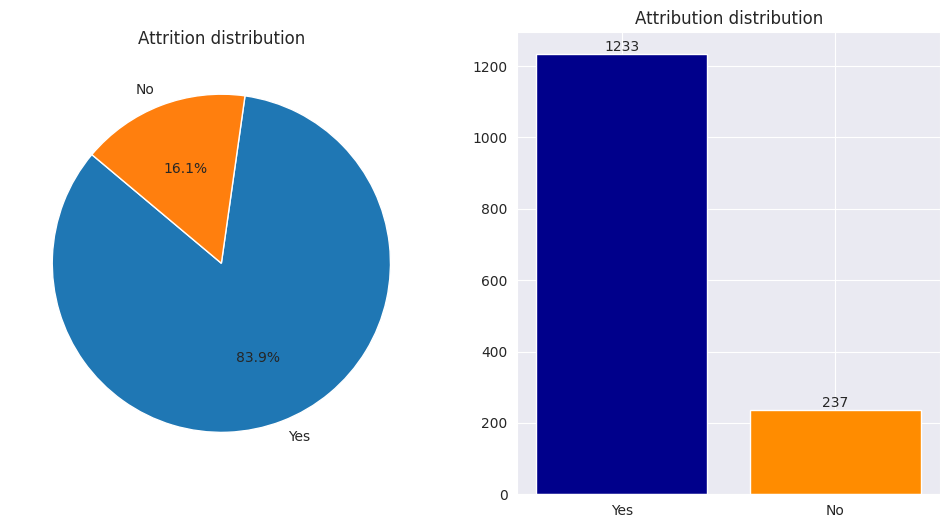

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].pie(df.Attrition.value_counts(), labels=df.Attrition.unique(), autopct='%1.1f%%', startangle=140)
ax[0].set_title("Attrition distribution")

ax[1].bar(df.Attrition.unique(), df.Attrition.value_counts(), color=["darkblue", "darkorange"])
for bars in ax[1].containers:
    ax[1].bar_label(bars)

plt.title("Attribution distribution")
plt.show()

As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%

Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

<a id = "eda-social"></a>
## Social circumstances analysis

In this section, we will try to see if there are any discrepancies between male and females in the organization. Also, we will look at other basic information such as the age, level of job satisfaction and average salary by gender.


##### Age

Text(0.5, 1.0, 'Age Distribution in Percent by Attrition Status')

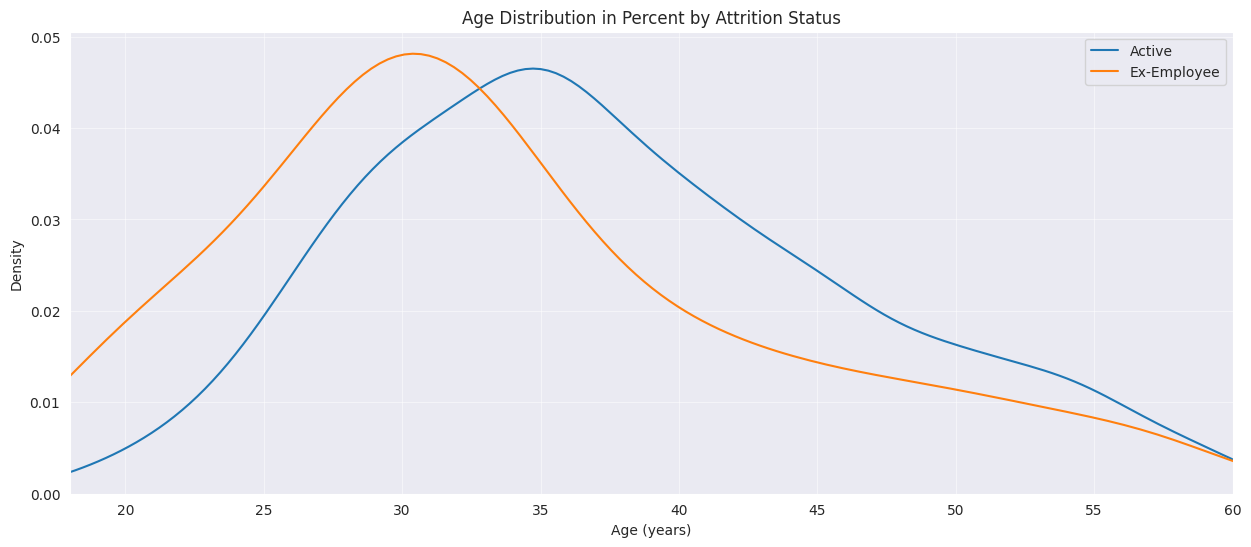

In [13]:
plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'Age'], label = 'Active')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employee')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent by Attrition Status')

It seems that younger employees are more likely to leave the company. 

##### Gender

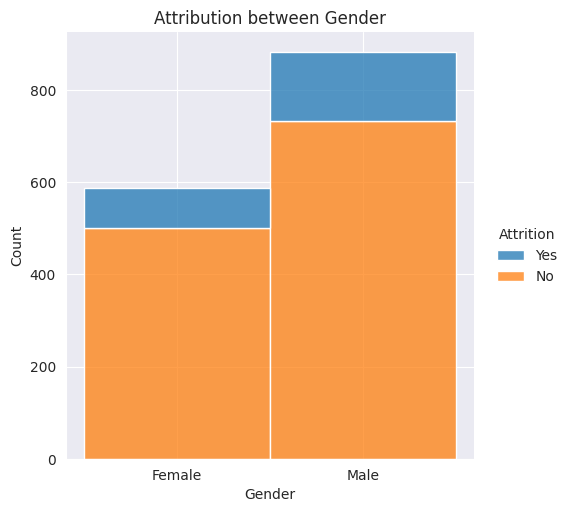

In [14]:
sns.displot(data=df, x="Gender", hue="Attrition", multiple="stack").set(title="Attribution between Gender")

In [15]:
value_counts_with_percentage = df[['Gender','Attrition']].groupby('Gender').value_counts().groupby(level=0).apply(lambda x: x / x.sum() * 100)
value_counts_with_percentage 

Gender  Gender  Attrition
Female  Female  No           85.204082
                Yes          14.795918
Male    Male    No           82.993197
                Yes          17.006803
Name: count, dtype: float64

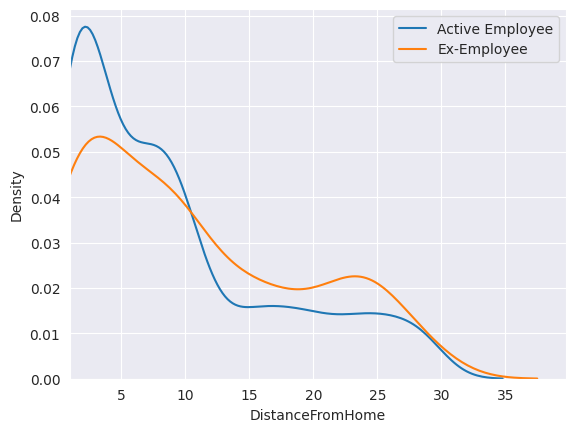

In [16]:
fig, ax = plt.subplots()
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employee')
ax.set_xlim(1)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Distribution of companies worked for')

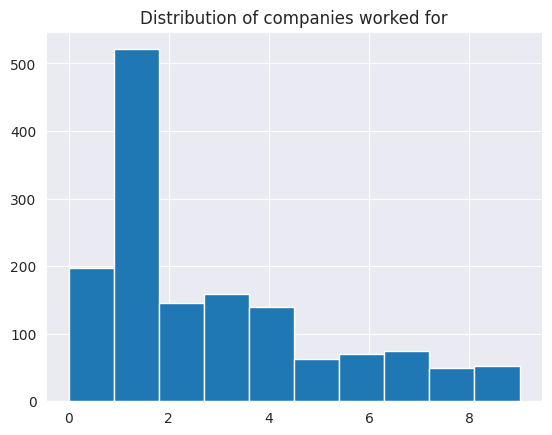

In [17]:
df.NumCompaniesWorked.hist()
plt.title("Distribution of companies worked for")

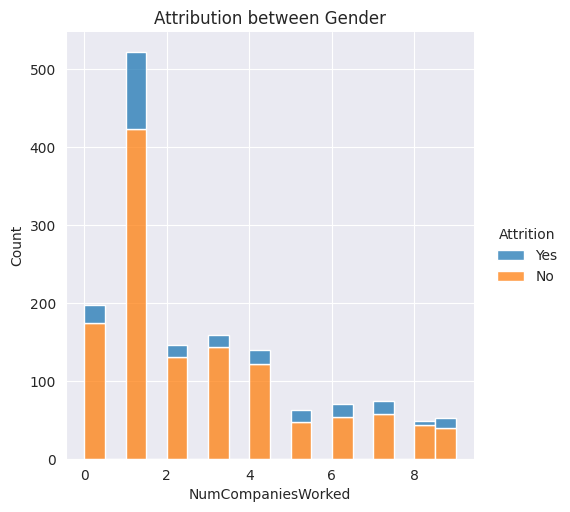

In [18]:
sns.displot(data=df, x="NumCompaniesWorked", hue="Attrition", multiple="stack").set(title="Attribution between Gender")

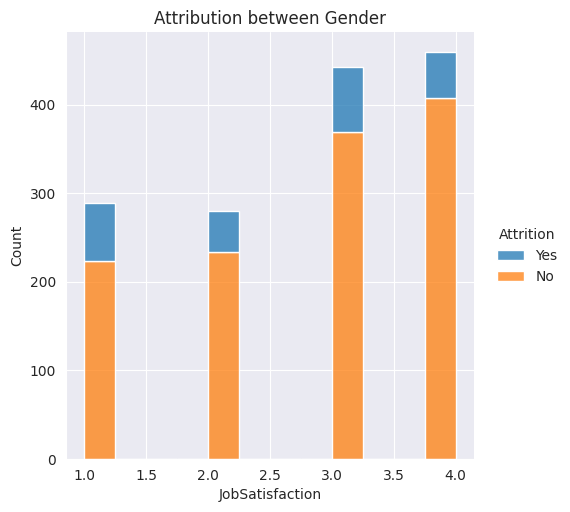

In [19]:
sns.displot(data=df, x="JobSatisfaction", hue="Attrition", multiple="stack").set(title="Attribution between Gender")

<a id = "eda-workenvironment"></a>
### Work environment

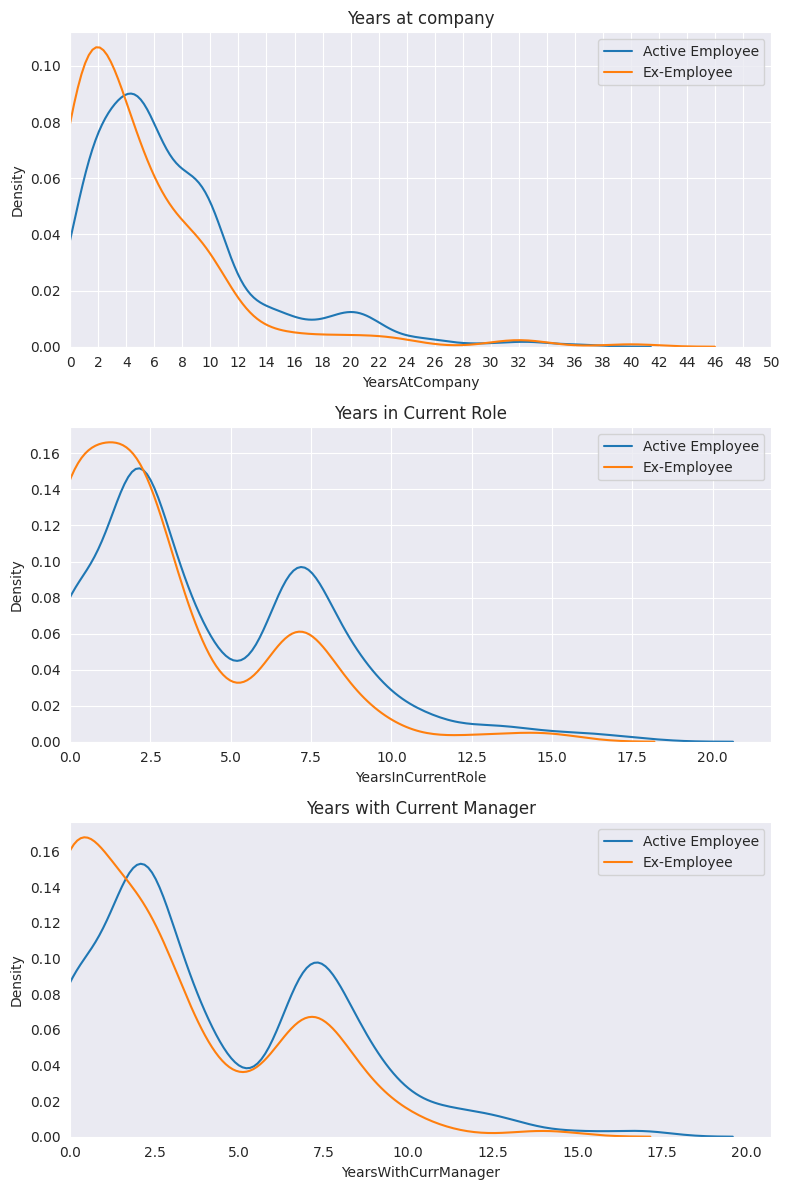

In [20]:
# Creating a 2x1 subplot
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee', ax=axs[0])
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employee', ax=axs[0])
axs[0].set_xlim(0)
axs[0].set_title('Years at company')
axs[0].set_xticks(range(0, 52, 2))
axs[0].legend()

# Plotting 'YearsInCurrentRole' in the first subplot
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsInCurrentRole'], label='Active Employee', ax=axs[1])
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsInCurrentRole'], label='Ex-Employee', ax=axs[1])
axs[1].set_xlim(0)
axs[1].set_title('Years in Current Role')
axs[1].legend()

# Plotting 'YearsWithCurrManager' in the second subplot
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsWithCurrManager'], label='Active Employee', ax=axs[2])
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsWithCurrManager'], label='Ex-Employee', ax=axs[2])
axs[2].set_xlim(0)
axs[2].set_title('Years with Current Manager')
axs[2].legend()

# Adjusting layout for better readability
plt.tight_layout()
plt.grid()

# Display the plot
plt.show()

After 2 year with the company attrition of employees reduces. The average for active employees is 7.4 years for active employees and the mean for ex-employees is 5.1 years at the company. After around 7.5 in the same role and with the current manager attrition increases again for employees.

In [21]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

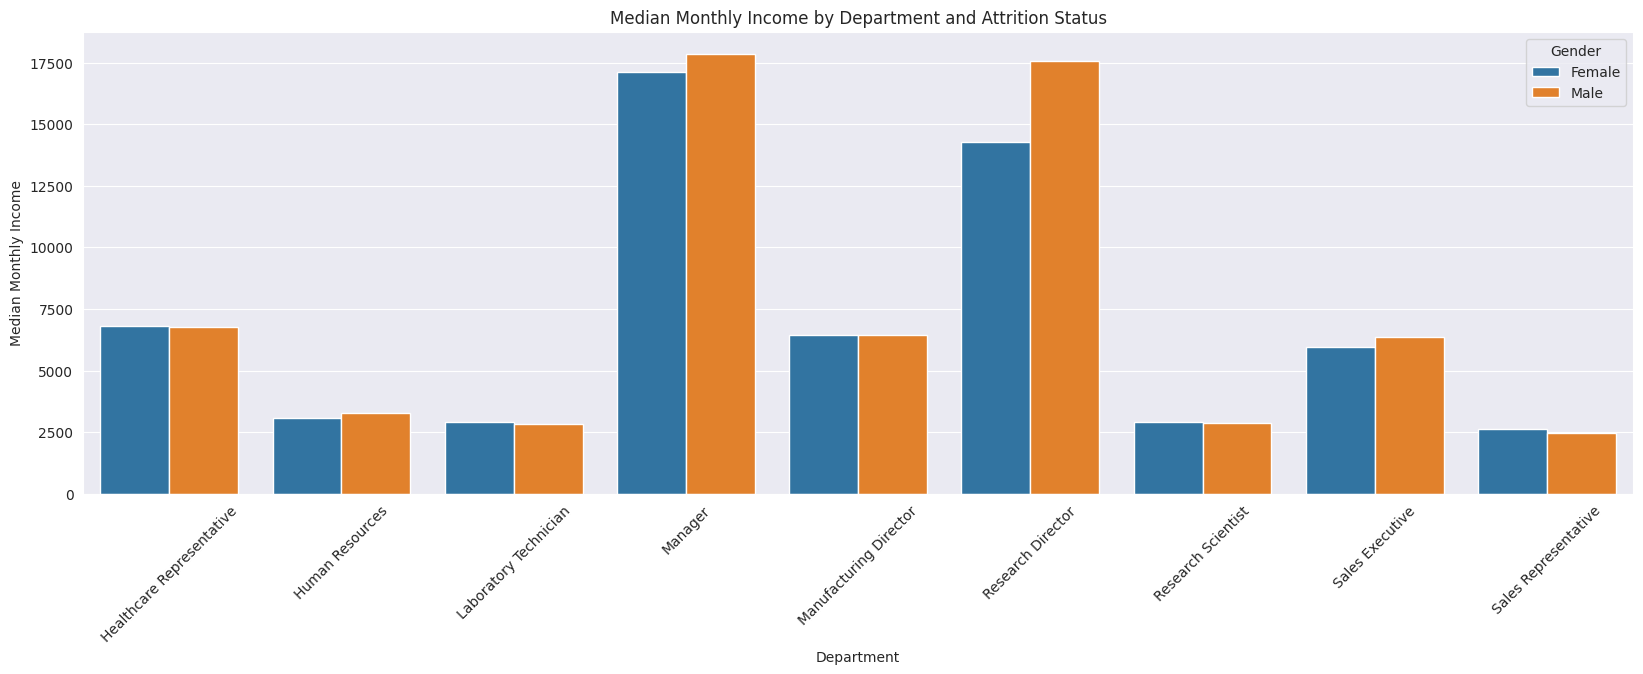

In [22]:
# Assuming 'df' is your original DataFrame
plot_df = df.groupby(['JobRole', 'Gender'])['MonthlyIncome'].median().reset_index()

# Creating the bar plot
plt.figure(figsize=(20,6))
sns.barplot(data=plot_df, x='JobRole', y='MonthlyIncome', hue='Gender')

plt.title('Median Monthly Income by Department and Attrition Status')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.ylabel('Median Monthly Income')
plt.show()

In higher roles such as Manager, Research Director or sales Excecutive a gender pay gap can be recognized.

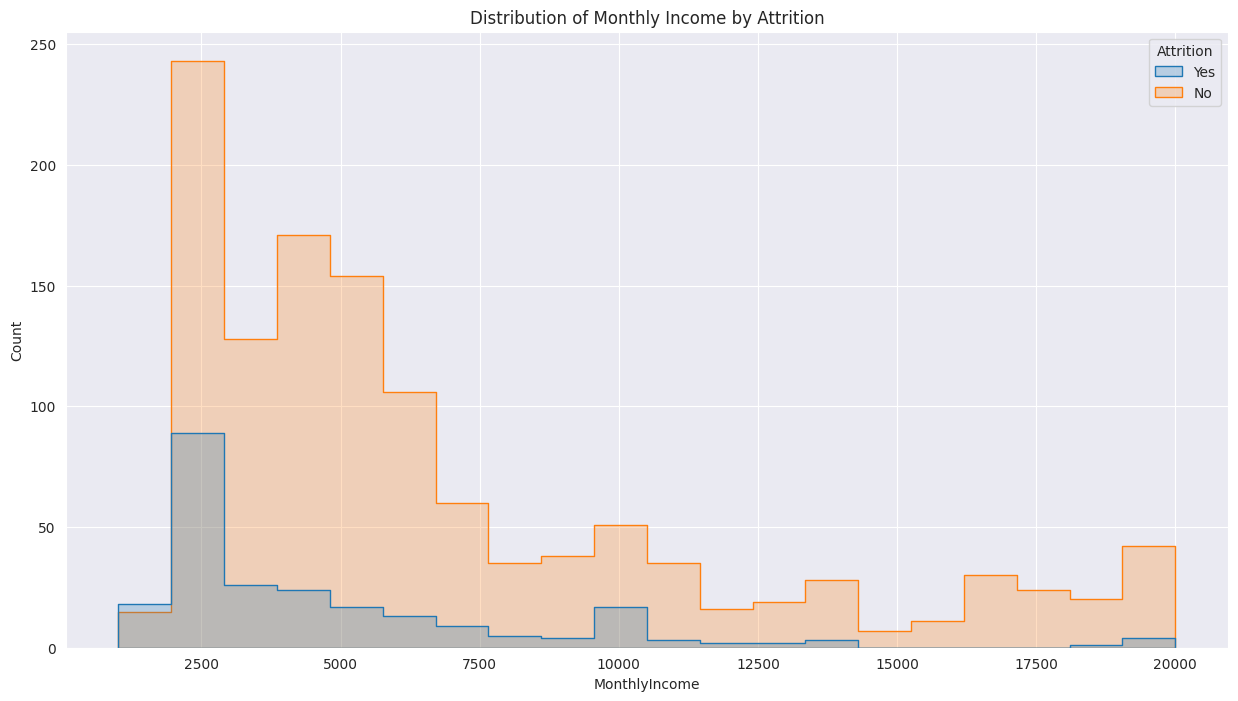

In [23]:
plt.figure(figsize=(15,8))
sns.histplot(df, x="MonthlyIncome", hue="Attrition", element="step")
plt.title('Distribution of Monthly Income by Attrition')
plt.show()

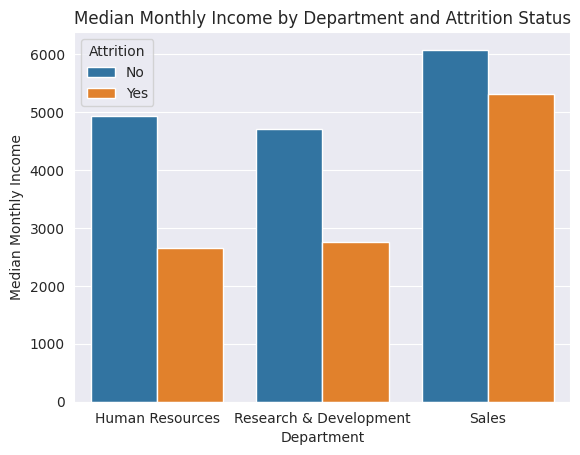

In [24]:
# Assuming 'df' is your original DataFrame
plot_df = df.groupby(['Department', 'Attrition'])['MonthlyIncome'].median().reset_index()

# Creating the bar plot
sns.barplot(data=plot_df, x='Department', y='MonthlyIncome', hue='Attrition')

plt.title('Median Monthly Income by Department and Attrition Status')
plt.xlabel('Department')
plt.ylabel('Median Monthly Income')
plt.show()

In comparison to current employees, former employees had lower median salaries across all three departments. In Human Resources, women tend to have higher median salaries than men.

<a id = "correlation"></a>
## Correlation Matrix

In [25]:
df_trans = df.copy()
df_trans['Attrition'] = df_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)

In [26]:
# Swap 'Age' and 'Attrition' columns
cols = list(df_trans.columns)
age_idx, attrition_idx = cols.index('Age'), cols.index('Attrition')
cols[age_idx], cols[attrition_idx] = cols[attrition_idx], cols[age_idx]

# Reindex DataFrame with the new column order
df_trans = df_trans[cols]

In [27]:
corr_matrix = df_trans.select_dtypes(include=['float64', 'int64']).corr()

<Axes: >

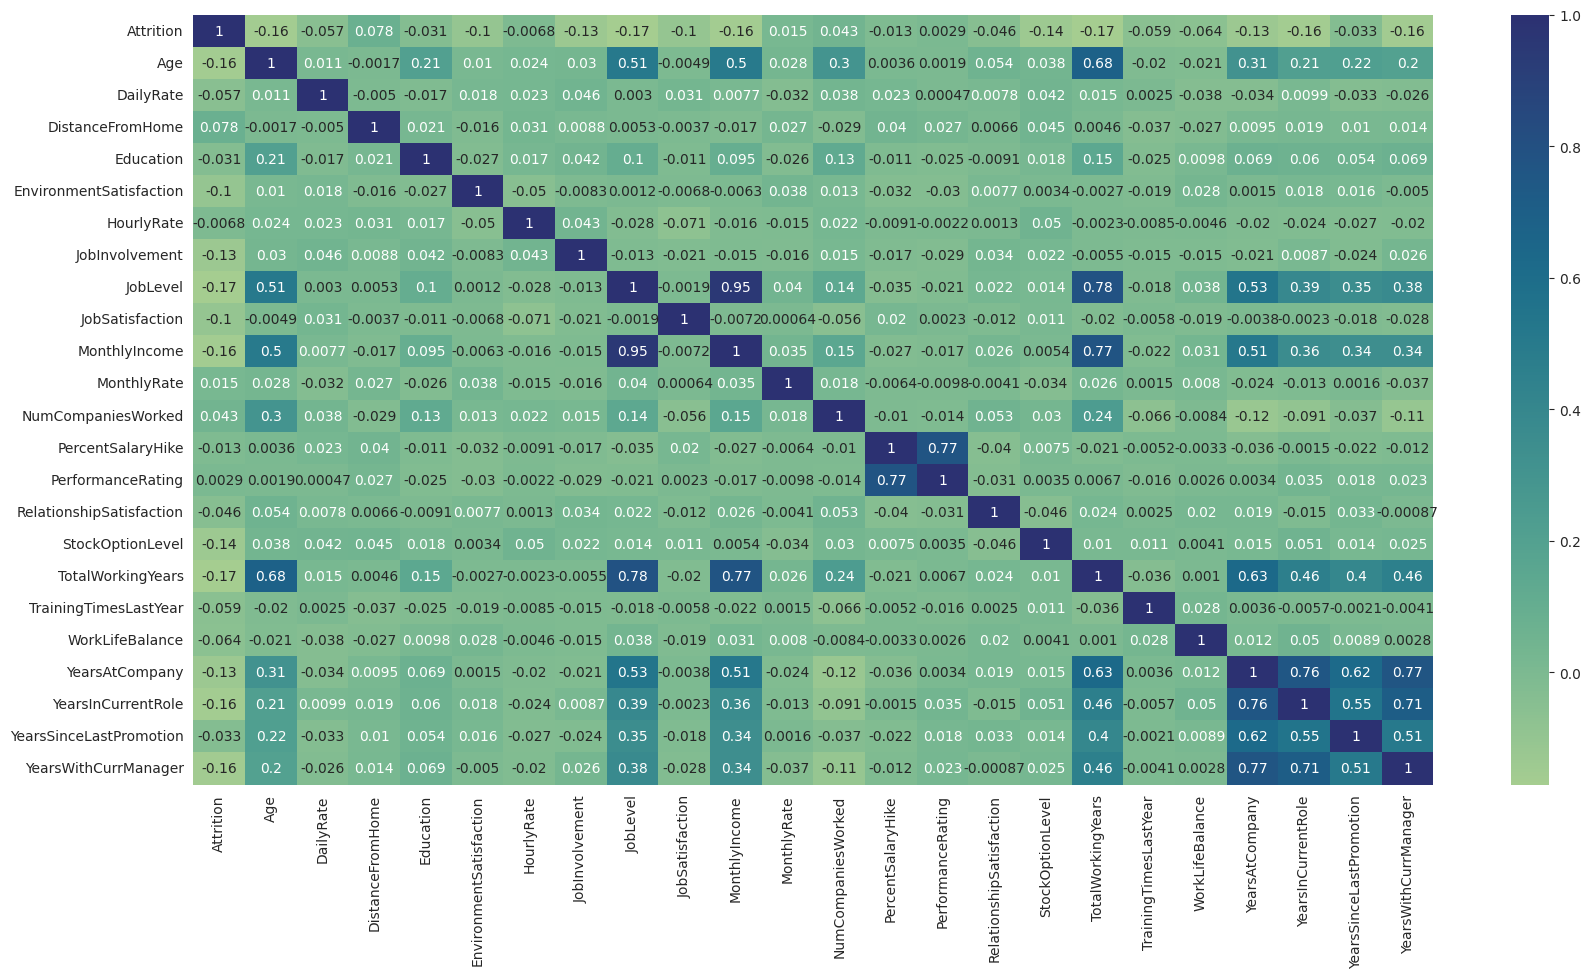

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, cmap="crest", annot=True,)

## 📝 Correlation results (sample analysis):

* Monthly income is highly correlated with Job level
* Job level is highly correlated with total working hours.
* Monthly income is highly correlated with total working hours.
* Age is also positively correlated with the Total working hours.
* Marital status and stock option level are negatively correlated

<a id = "dataprocessing"></a>
## 🔨 Data Processing

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [30]:
# Drop target var from categorical col list
categorical_columns = categorical_columns.drop('Attrition')

# find out binary columns
bin_cols = df_trans.nunique()[df_trans.nunique() == 2].keys()
bin_cols = bin_cols.drop('Attrition').to_list()

# drop binary from categorical columns list 
categorical_columns = categorical_columns.drop(["Gender", "OverTime"])

In [31]:
bin_cols

['Gender', 'OverTime', 'PerformanceRating']

In [32]:
le = LabelEncoder()

for col in bin_cols:
    df_trans[col] = le.fit_transform(df_trans[col])

In [33]:
df_trans = pd.get_dummies(data=df_trans, columns=categorical_columns, drop_first=True, dtype='uint8')

In [34]:
df_trans.head(2)

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,41,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,0,49,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0


<a id = "ml"></a>
## 🤖 ML Modeling

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [36]:
X = df_trans.drop('Attrition', axis=1)
y = df_trans.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [37]:
X_train_std

array([[ 1.09019402,  1.04945488, -0.89991452, ..., -0.23186945,
        -0.92144268, -0.68154831],
       [-1.6348276 , -0.52344929, -0.89991452, ..., -0.23186945,
         1.08525471, -0.68154831],
       [ 0.98119316, -0.99208001, -0.77761018, ..., -0.23186945,
         1.08525471, -0.68154831],
       ...,
       [-1.6348276 , -1.46320345, -0.16608847, ..., -0.23186945,
         1.08525471, -0.68154831],
       [-0.10881549, -0.93225481, -0.89991452, ..., -0.23186945,
         1.08525471, -0.68154831],
       [ 0.21818711, -0.09470203,  1.30156365, ..., -0.23186945,
        -0.92144268, -0.68154831]])

### Baseline Algorithm

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
# LogReg
lgr = LogisticRegression(solver='liblinear', random_state=15, class_weight='balanced')
# KFold
kf = KFold(n_splits=10, random_state=15, shuffle=True)  # 5-fold cross-validation

In [40]:
cv_acc_results = cross_val_score(lgr, X_train, y_train, cv=kf, scoring='accuracy')
cv_roc_results = cross_val_score(lgr, X_train, y_train, cv=kf, scoring='roc_auc')

In [41]:
cv_acc_results.mean(), cv_roc_results.mean()

(0.7525423728813558, 0.8389705765631523)

### Other Algorithms

* **SGDClassifier** (optimizes the objective function using the stochastic gradient descent method, efficiently handling large datasets by updating model parameters using only a single data point (or a small batch of data points) at a time) 
* **Support Vector Machines** (finding the optimal boundary (or hyperplane) that maximizes the margin between different classes in the feature space)
* **DecisionTrees** (splitting the data into branches based on feature values, creating a tree-like structure where each leaf node represents a class label decided by the majority of training instances reaching that leaf)

In [42]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

In [43]:
models = []

models.append(('SGDClassifier', SGDClassifier(loss="hinge", random_state=15)))
models.append(('SVM', SVC(gamma='auto', random_state=15)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=15)))

In [44]:
acc_results = []
auc_results = []
names = []
# Model pipeline
col = ['Algorithm', 'ROC AUC Mean', 'Accuracy Mean']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    cv_auc_results = cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kf, scoring='roc_auc')
    
    cv_acc_results = cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kf, scoring='accuracy')

    auc_results.append(cv_auc_results)
    acc_results.append(cv_acc_results)
    
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean(), 2),
                         round(cv_acc_results.mean(), 2)
                         ]
    i += 1


df_results.sort_values(by=['ROC AUC Mean'], ascending=False)
df_results

,Algorithm,ROC AUC Mean,Accuracy Mean
0,SGDClassifier,0.61,0.77
1,SVM,0.50,0.84
2,Decision Tree Classifier,0.62,0.78


#### Fine-tuning

In [45]:
from sklearn.model_selection import GridSearchCV

##### Logistic Regression

In [46]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
}

In [47]:
grid_search = GridSearchCV(LogisticRegression(solver="liblinear",class_weight="balanced", random_state=15),param_grid, cv=10, scoring='roc_auc', verbose=0)

In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=15, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, scoring='roc_auc')

In [49]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
results = grid_search.cv_results_


best_params, best_model, grid_search.best_score_

({'C': 10},
 LogisticRegression(C=10, class_weight='balanced', random_state=15,
                    solver='liblinear'),
 0.8245668283262267)

#### DecisionTreeClassifier

In [50]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2,4,6],
}

In [51]:
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=15),param_grid_tree, cv=10, scoring='roc_auc', verbose=0)
grid_search_tree.fit(X_train, y_train)
best_params_tree = grid_search_tree.best_params_
best_model_tree = grid_search_tree.best_estimator_
results_tree = grid_search_tree.cv_results_


best_params_tree, best_model_tree, grid_search_tree.best_score_

({'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2},
 DecisionTreeClassifier(max_depth=4, random_state=15),
 0.6979789842571797)

Using cross-validation to tune the parameters, the tree model with the best AUC has a max depth of 4 using min_sample_split of 2. In adiition gini impurity instead of entropy is preferred.

In [52]:
features = pd.DataFrame({"Feat_importance": grid_search_tree.best_estimator_.feature_importances_}, index=X_train.columns).sort_values(by="Feat_importance", ascending=False)
features = features[features['Feat_importance'] > 0]

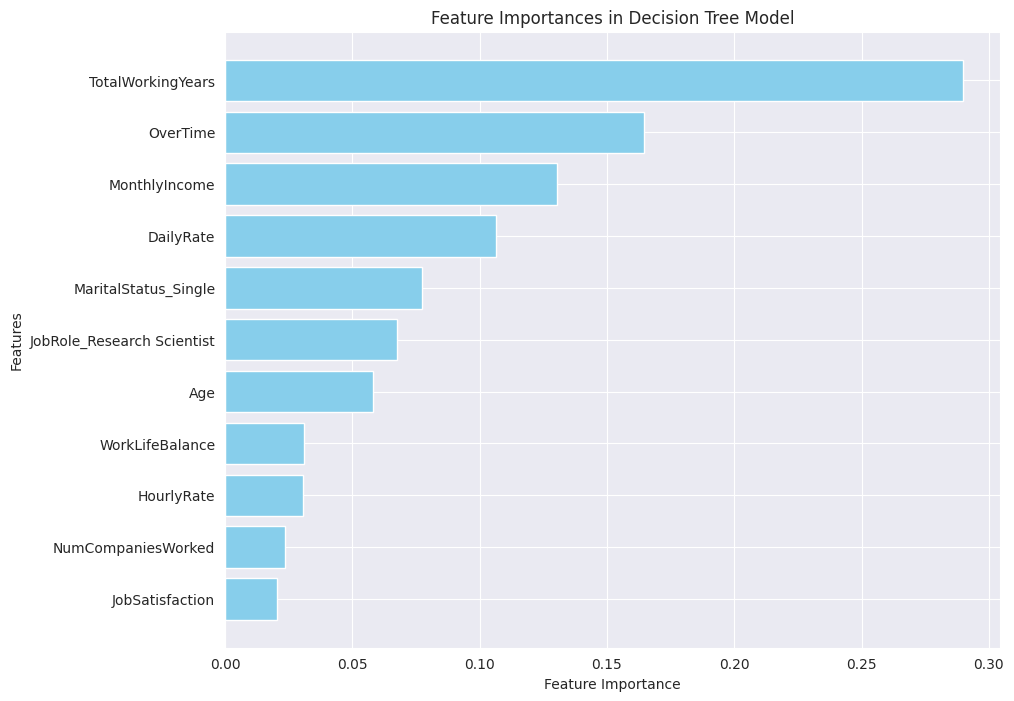

In [53]:
plt.figure(figsize=(10, 8))
plt.barh(features.index, features['Feat_importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Decision Tree Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

This bar graph shows the most important variables in predicting employee attrition using DecisionTreeClassifier Gini importance measure. Based on this graph, TotalWorkingYears, OverTime, and MonthlyIncome are the most important predictors of employee attrition. 

#### Model evaluation

In [54]:
grid_search_tree

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=15),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6]},
             scoring='roc_auc')

In [55]:
test_auc=roc_auc_score(y_test, grid_search.predict_proba(X_test)[:,1])
test_auc_tree=roc_auc_score(y_test, grid_search_tree.predict_proba(X_test)[:,1])
test_acc=accuracy_score(y_test, grid_search.predict(X_test))
test_acc_tree=accuracy_score(y_test, grid_search_tree.predict(X_test))
print("LogisticRegression Accuracy: {:.1f}% and AUC = {:.3f}".format(test_acc*100, test_auc))
print("Decision Tree Accuracy: {:.1f}% and AUC = {:.3f}".format(test_acc_tree*100, test_auc_tree))

LogisticRegression Accuracy: 74.8% and AUC = 0.800
Decision Tree Accuracy: 81.0% and AUC = 0.692


<a id = "conclusion"></a>
## Conclusion


In this analysis, we found that 16% of employees left the company in the previous quarter, with more than half leaving from the Research & Development department. Among women, the highest turnover occurred in the Human Resources department. About 1 in every 4 workers with the lowest work-life balance left the company, though the majority of employees who left rated their job satisfaction as good or excellent. Among former employees, salary was found to be significantly lower, with a median monthly income about $2,000/month less than current employees. 



Based on the feature importances from the Decision Tree model, an employee's total years in the company, if hes working overtimes and monhtly income were among the most influential predictors of employee attrition. With these features, our model was able to predict the likelihood of an employee leaving the company with an Area Under the Curve of 0.7 on the test set and accruacy of 0.8. In comparison, Logistic Regression model was able to generate a AUC of 0.8 and 0.75 accuracy. 

To further improve on the model, additional data on employees who left or using weighted sampling methods could be used to help with handling the class imbalance in our data.
